##### Codes are pretty easy to follow but incase of confusion i recommend first to take a look at the graphs/plots and follow up the codes.

<center><h1>Los Angels Crime Analysis</h1></center>

<p id='top'></P>
<ul>
    <li><a href='#one'>Crimes by Year (2010-2020)</a></li>
    <li><a href='#two'>Crimes by Year/Months (2010-2020)</a></li>
    <li><a href='#three'>Crimes counts by Day (2010-2020)</a></li>
    <li><a href='#four'>Frequency of Crime Start Times by Crime Types in 2020</a></li>
    <li><a href='#five'>Frequency of Crime start Times by Day of the Week in 2020</a></li>
    <li><a href='#six'>Proportion of Crime Types by Day of the Week in 2020</a></li>
    <li><a href='#seven'>Proportion of Crime Types by Month in 2020</a></li>
    <li><a href='#eight'>Crimes Incidents/Frequency by Months(2020)</a></li>
    <li><a href='#nine'> Crimes Incidents/Frequency/Counts by Days of the Week (2020)</a></li>
    <li><a href='#ten'>Most and Less Frequent crimes in 2020</a></li>
 </ul>
<h3>Victim Age and Sex Analysis</h3>
 <ul>
    <li><a href='#eleven'>Age distribution based on Sex</a></li>
    <li><a href='#12'> Top Crimes happening to Male and Female</a></li>
    <li><a href='#13'>Crime Trend for Male and Female (Victim Sex) by months in 2020</a></li>
    <li><a href='#14'>Crime trend for Victim Sex in 2020 by Day</a></li>
 </ul>
 <h3>Victim Age Group Analysis</h3>
 <ul>
    <li><a href='#15'>Crimes Counts by Age Group</a></li>
    <li><a href='#16'>Crimes trend for Age Group in 2020 by Day</a></li>
    <li><a href='#17'>What are the most frequent crimes happening to various age groups?</a></li>
    <li><a href='#18'>Crimes counts for Age Groups based on Sex(M or F)</a></li>
</ul>
<h3>Victim Descent Analysis</h3>
 <ul>
    <li><a href='#19'>Crimes count (Victim Descent)</a></li>
</ul>
<h3>Areas(Neighborhood) and Premises</h3>
 <ul>
    <li><a href='#23'>Top Crimes by AREAS(Neighborhoods)</a></li>
    <li><a href='#24'>What are major Crimes happening in this Areas(above crime prone areas)?</a></li>
    <li><a href='#25'>Crimes at different Premises(top 20)</a></li>
    <li><a href='#26'>What are the major crimes happening in this Premises?(above top 20 orenuses)</a></li>
</ul>

<h3>Others...</h3>
 <ul>
    <li><a href='#27'>Weopons usedf for Crimes (top 10)</a></li>
    <li><a href='#28'>Crimes Reporting District</a></li>
    <li><a href='#29'>Reporting District Crime Mapping</a></li>
</ul>


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

In [5]:
import os 
os.chdir('/content/drive/MyDrive/programs/Datasets/Los Angles Crime data')

In [30]:
dataset1 = pd.read_csv('data/Crime_Data_from_2010_to_2019.csv')
dataset2 = pd.read_csv('data/LA_crime_data _2020.csv')
dataset3 = pd.read_csv('data/crimes_2020_2021.csv')
dataset = pd.concat([dataset1,dataset2])
print(dataset.shape)
dataset.head(2)

(2312883, 29)


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,AREA
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13.0,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,NaN
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14.0,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,NaN


In [31]:
# here we shall chage columns name to more readable form
data = dataset.copy()
data = data.rename(columns = {'DR_NO':'DR Number','Date Rptd':'Date Reported','DATE OCC':"Date Occurred",
                              'TIME OCC':'Time Occurred', 'AREA':'Aread ID','Rpt Dist No':'Reporting District No',
                              'Crm Cd':'Crime Code','Crm Cd Desc':'Crime Code Description','Mocodes':'MO codes',
                              'Vict Age':'Victim Age','Vict Sex':'Victim Sex','Vict Descent':'Victim Descent',
                              'Premis Cd':'Premise Code','Premis Desc':'Premise Description','Weapon Used Cd':'Weapon Used Code',
                              'Weapon Desc':'Weapon Description','Status':'Status Code','Status Desc':'Status Description',
                              'Crm Cd 1':'Crime Code 1','Crm Cd 2':'Crime Code 2','Crm Cd 3':'Crime Code 3','Crm Cd 4':'Crime Code 4'})

In [32]:
# here we shall chage columns name to more readable form
data1 = dataset3.copy()
data1 = data1.rename(columns = {'dr_no':'DR Number', 'date_rptd':'Date Reported', 'date_occ':"Date Occurred", 
                              'time_occ':'Time Occurred', 'area':'AREA', 'area_name':'AREA NAME', 'rpt_dist_no':'Reporting District No', 
                              'part_1_2':'Part 1-2', 'crm_cd':'Crime Code', 'crm_cd_desc':'Crime Code Description', 'mocodes':'MO codes',
                              'vict_age':'Victim Age', 'vict_sex':'Victim Sex', 'vict_descent':'Victim Descent', 
                              'premis_cd':'Premise Code', 'premis_desc':'Premise Description', 'weapon_used_cd':'Weapon Used Code',
                              'weapon_desc':'Weapon Description','status':'Status Code','status_desc':'Status Description',
                              'crm_cd_1':'Crime Code 1', 'crm_cd_2':'Crime Code 2', 'crm_cd_3':'Crime Code 3', 'crm_cd_4':'Crime Code 4', 
                              'location':'LOCATION', 'lat':'LAT', 'lon':'LON','cross_street':'Cross Street'})

In [8]:
data.head(2)

,DR Number,Date Reported,Date Occurred,Time Occurred,AREA,AREA NAME,Reporting District No,Part 1-2,Crime Code,Crime Code Description,MO codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Weapon Used Code,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,LOCATION,Cross Street,LAT,LON,Aread ID
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13.0,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,NaN
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14.0,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,NaN


In [9]:
"""
def split_datetime(x):
  txt = x
  y = txt.split(' ',1)
  return y[1]

data['Hour (crime occured)'] = data['Date Occurred'].apply(split_datetime)
data['Hour (crime reported)'] = data['Date Reported'].apply(split_datetime)
"""

"\ndef split_datetime(x):\n  txt = x\n  y = txt.split(' ',1)\n  return y[1]\n\ndata['Hour (crime occured)'] = data['Date Occurred'].apply(split_datetime)\ndata['Hour (crime reported)'] = data['Date Reported'].apply(split_datetime)\n"

In [33]:
import datetime as dt
data['Date Occurred'] = pd.to_datetime(data['Date Occurred'])
data['Date Reported'] = pd.to_datetime(data['Date Reported'])
data1['Date Occurred'] = pd.to_datetime(data1['Date Occurred'])
data1['Date Reported'] = pd.to_datetime(data1['Date Reported'])

data['Occ_Year'] = data['Date Occurred'].dt.year
data['Occ_Month'] = data['Date Occurred'].dt.month
data['Occ_Day'] = data['Date Occurred'].dt.weekday
data['Occ_M/Y'] = data['Date Occurred'].dt.to_period('m')

data['Rep_Year'] = data['Date Reported'].dt.year 
data['Rep_Month'] = data['Date Reported'].dt.month 
data['Rep_Day'] = data['Date Reported'].dt.weekday 
data['Rep_M/Y'] = data['Date Reported'].dt.to_period('m')

data['Time Occurred'] = data['Time Occurred'].astype(str).str.zfill(4)
data['Crime_Time'] = data['Time Occurred'].apply(lambda t: int(t[:2]))

In [11]:
data.head(2)

,DR Number,Date Reported,Date Occurred,Time Occurred,AREA,AREA NAME,Reporting District No,Part 1-2,Crime Code,Crime Code Description,MO codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Weapon Used Code,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,LOCATION,Cross Street,LAT,LON,Aread ID,Occ_Year,Occ_Month,Occ_Day,Occ_M/Y,Rep_Year,Rep_Month,Rep_Day,Rep_M/Y,Crime_Time
0,1307355,2010-02-20,2010-02-20,1350,13.0,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,NaN,2010,2,5,2010-02,2010,2,5,2010-02,13
1,11401303,2010-09-13,2010-09-12,0045,14.0,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,NaN,2010,9,6,2010-09,2010,9,0,2010-09,0


In [37]:
# create dataframe of crime data from year 2016 to 2020. I am planning to use data for exploartion in Tableau.
df_2016_2020 = data.loc[data['Occ_Year'].isin([2016,2017,2018,2019])]
df_2016_2020.to_csv('data/crimes_2016_2019.csv')

In [38]:
data1.to_csv('data/crimes_2020_2021.csv')   # save this after Age Group column is added

In [39]:
data1.head()

,Unnamed: 0,DR Number,Date Reported,Date Occurred,Time Occurred,AREA,AREA NAME,Reporting District No,Part 1-2,Crime Code,Crime Code Description,MO codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Weapon Used Code,Weapon Description,Status Code,Status Description,Crime Code 1,LOCATION,LAT,LON,Crime Code 2,Cross Street,Crime Code 3,Crime Code 4,Age Group
0,0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,NaN,NaN,NaN,NaN,Adults
1,1,190101086,2020-01-02,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,NaN,NaN,NaN,NaN,Adults
2,2,201220752,2020-09-16,2020-09-16,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),2004 1820 0913 0329 1202,62,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,700 E 73RD ST,33.9739,-118.2630,NaN,NaN,NaN,NaN,Adults
3,3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,998.0,NaN,NaN,NaN,Seniors
4,4,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,NaN,NaN,NaN,NaN,Adults


#### crime counts by Years(2010 - 2020)
<p><a href='#top'>Go to top</a></p>
<p id='one'></p>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


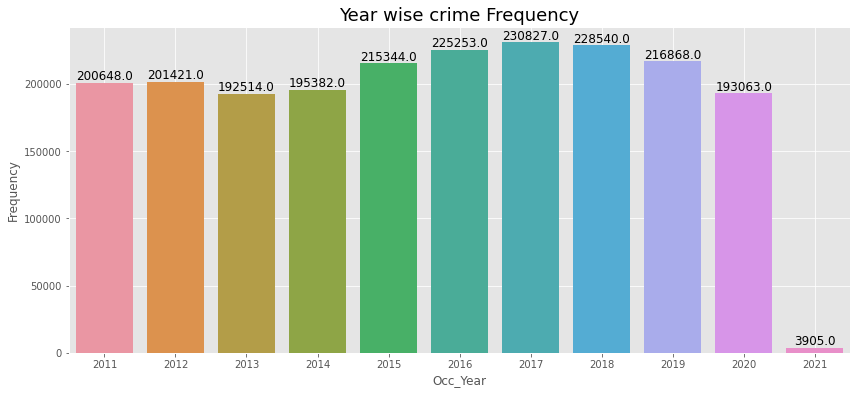

In [ ]:
df = data.groupby('Occ_Year').size().reset_index(name='Frequency').sort_values('Occ_Year', ascending=True)
df = df.reset_index()
df = df.drop('index', axis=1)
df = df.drop(0)

plt.figure(figsize=(14,6))
sns.barplot(df['Occ_Year'], df['Frequency'])
plt.title('Year wise crime Frequency', fontsize=18)
plt.grid(True)
for i, val in enumerate(df['Frequency'].values):
  plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
plt.savefig('Saved Plots/2020_analysis/Crime_Frequency_by_year.png')
plt.show()

#### Crimes by Year/Months (2010-2020)
<p><a href='#top'>Go to top</a></p>
<p id='two'></p>

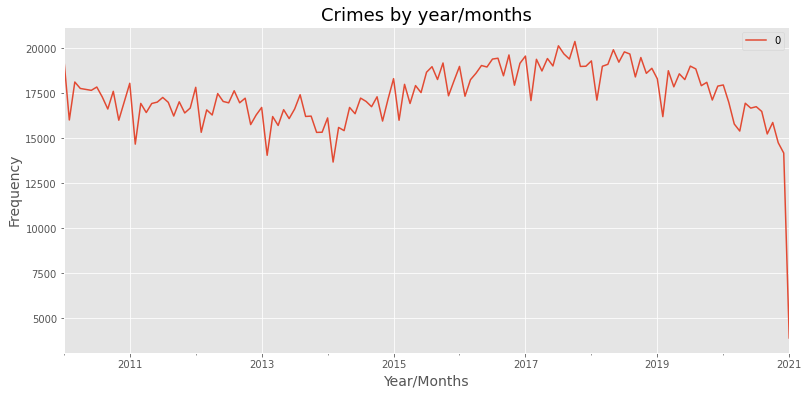

In [ ]:
ym = data.groupby('Occ_M/Y').size().reset_index()
ym.index = ym['Occ_M/Y']
labels = list(ym['Occ_M/Y'])
#plt.figure(figsize=(15,8))
from pylab import rcParams
rcParams['figure.figsize'] = 13, 6
ym.plot()
plt.title('Crimes by year/months', fontsize=18)
plt.xlabel('Year/Months', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
#plt.xticks(range(len(labels)), labels, rotation='vertical')
plt.savefig('Saved Plots/2020_analysis/Crimes_by_yearmonth.png')
plt.show()

#### Crimes counts by Day (2010-2020)
<p><a href='#top'>Go to top</a></p>
<p id='three'></p>

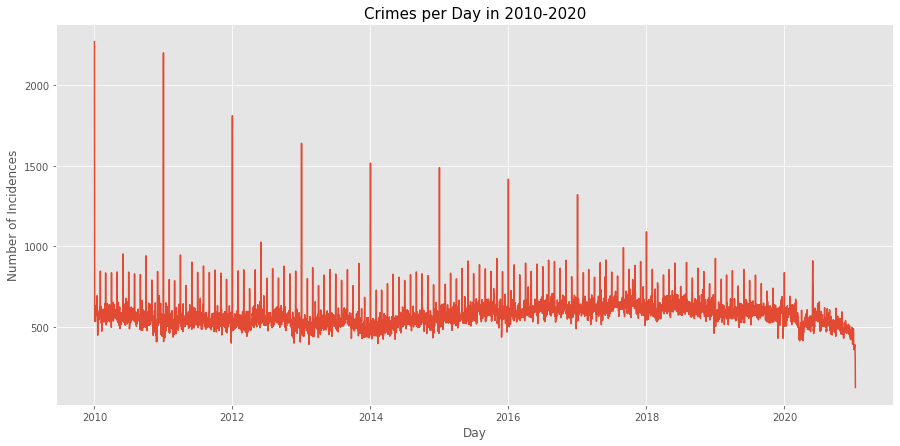

In [ ]:
df = data.groupby('Date Occurred').size().reset_index(name='Incident Counts')
plt.figure(figsize=(15,7))
plt.plot(df['Date Occurred'], df['Incident Counts'])
plt.title('Crimes per Day in 2010-2020', fontsize=15)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Number of Incidences', fontsize=12)
plt.savefig('Saved Plots/2020_analysis/crimes_by_day(2010-2020).png')
plt.show()

In [13]:
# finding most frequent crimes
topcrimes_df = data.groupby('Crime Code Description').size().reset_index(name='Incident Counts').sort_values('Incident Counts', ascending=False)
topcrimes_df.index = topcrimes_df['Crime Code Description']
topcrimes_df = topcrimes_df.drop('Crime Code Description', axis = 1)
topcrimes_df = topcrimes_df[topcrimes_df['Incident Counts']>50000]
topcrimes_df

,Incident Counts
Crime Code Description,
BATTERY - SIMPLE ASSAULT,207180
VEHICLE - STOLEN,180958
BURGLARY FROM VEHICLE,174808
BURGLARY,160503
THEFT PLAIN - PETTY ($950 & UNDER),160404
THEFT OF IDENTITY,133811
INTIMATE PARTNER - SIMPLE ASSAULT,125564
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",122413
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",104466


In [14]:
majorcrimes_df = data[data['Crime Code Description'].isin(list(topcrimes_df.index))].reset_index()
majorcrimes_df = majorcrimes_df.drop('index',axis=1)
majorcrimes_df['Crime Code Description'].unique()

array(['VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
       'BURGLARY FROM VEHICLE',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'BATTERY - SIMPLE ASSAULT', 'ROBBERY',
       'INTIMATE PARTNER - SIMPLE ASSAULT',
       'THEFT PLAIN - PETTY ($950 & UNDER)',
       'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 'BURGLARY',
       'VEHICLE - STOLEN', 'THEFT OF IDENTITY',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)'], dtype=object)

In [15]:
selected_crimes = list(topcrimes_df.index)
selected_crimes

['BATTERY - SIMPLE ASSAULT',
 'VEHICLE - STOLEN',
 'BURGLARY FROM VEHICLE',
 'BURGLARY',
 'THEFT PLAIN - PETTY ($950 & UNDER)',
 'THEFT OF IDENTITY',
 'INTIMATE PARTNER - SIMPLE ASSAULT',
 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
 'ROBBERY',
 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)']

In [16]:
crimes_2020 = data[data['Occ_Year']==2020]
crimes_2020.shape

(193063, 38)

**crimes_2020** original dataset for year 2020.  
**LA_rimes_2020** dataset for year 2020 only with major crimes

### Frequency of Crimes Start times by Crimes Types in 2020
<p id = "crimetime"></p>

In [17]:
# Crimes in 2020. Only major/top crimes
LA_crimes_2020 = crimes_2020[crimes_2020['Crime Code Description'].isin(selected_crimes)]
LA_crimes_2020 = LA_crimes_2020.reset_index()
LA_crimes_2020.drop('index', axis=1, inplace=True)
LA_crimes_2020.shape

(149840, 38)

#### Frequency of Crime Start Times by Crime Types in 2020
<p><a href='#top'>Go to top</a></p>
<p id='four'></p>

In [ ]:
df = LA_crimes_2020.groupby(['Crime_Time','Crime Code Description']).size().reset_index(name='Incident Counts')
df['proportion'] = df['Incident Counts']/sum(df['Incident Counts'])
df

,Crime_Time,Crime Code Description,Incident Counts,proportion
0,0,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",521,0.003477
1,0,BATTERY - SIMPLE ASSAULT,506,0.003377
2,0,BURGLARY,475,0.003170
3,0,BURGLARY FROM VEHICLE,479,0.003197
4,0,CRIMINAL THREATS - NO WEAPON DISPLAYED,95,0.000634
...,...,...,...,...
355,23,THEFT PLAIN - PETTY ($950 & UNDER),247,0.001648
356,23,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",138,0.000921
357,23,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",627,0.004184
358,23,VANDALISM - MISDEAMEANOR ($399 OR UNDER),320,0.002136


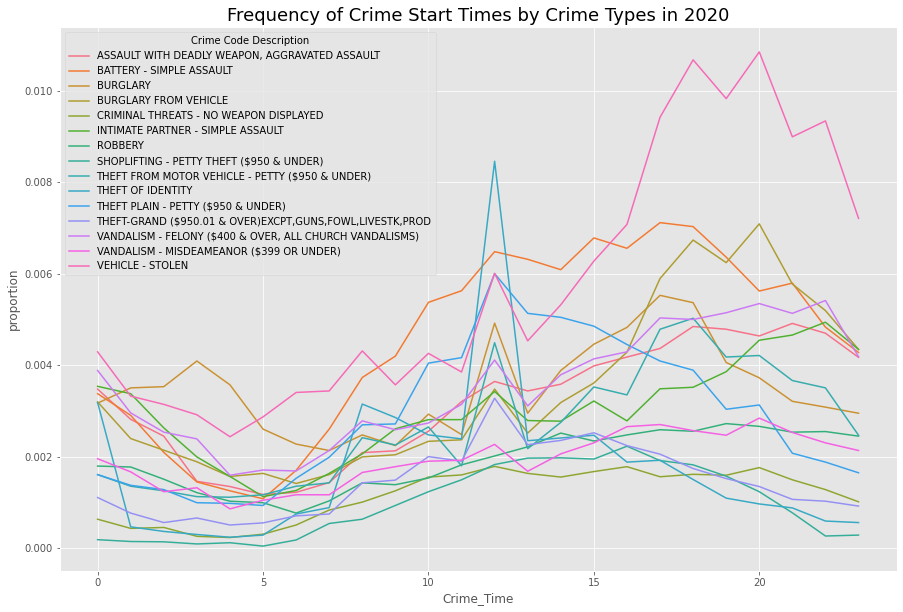

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x='Crime_Time', y='proportion', hue='Crime Code Description', data=df)
plt.title('Frequency of Crime Start Times by Crime Types in 2020', fontsize=18 )
plt.grid(True)
plt.savefig('Saved Plots/2020_analysis/Frequency of Crime Start Times by Crime Types in 2020.png')
plt.show()

#### Frequency of Crime start Times by Day of the Week in 2020
 <p><a href='#top'>Go to top</a></p>
<p id='five'></p>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


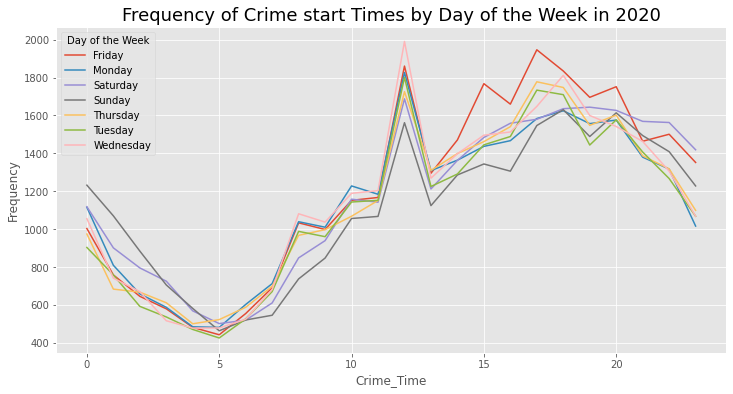

In [ ]:
def function(day):
  if day == 0:
    return 'Monday'
  elif day == 1:
    return 'Tuesday'
  elif day == 2:
    return 'Wednesday'
  elif day ==3:
    return "Thursday"
  elif day == 4:
    return "Friday"
  elif day == 5:
    return "Saturday"
  elif day == 6:
    return "Sunday"
  else:
    return "Invalid"

crimes_2020['Day of the Week'] = crimes_2020['Occ_Day'].apply(lambda x: function(x))

df = crimes_2020.groupby(['Crime_Time','Day of the Week']).size().reset_index(name='Frequency')
df['Proportion'] = df['Frequency']/sum(df['Frequency'])

plt.figure(figsize=(12,6))
sns.lineplot(x='Crime_Time', y='Frequency', hue='Day of the Week',data=df)
plt.title('Frequency of Crime start Times by Day of the Week in 2020', fontsize=18)
plt.grid(True)
plt.savefig('Saved Plots/2020_analysis/Frequency of Crime start Times by Day of the Week in 2020.png')
plt.show()

##### Proportion of Crime Types by Day of the Week in 2020
<p><a href='#top'>Go to top</a></p>
<p id='six'></p>

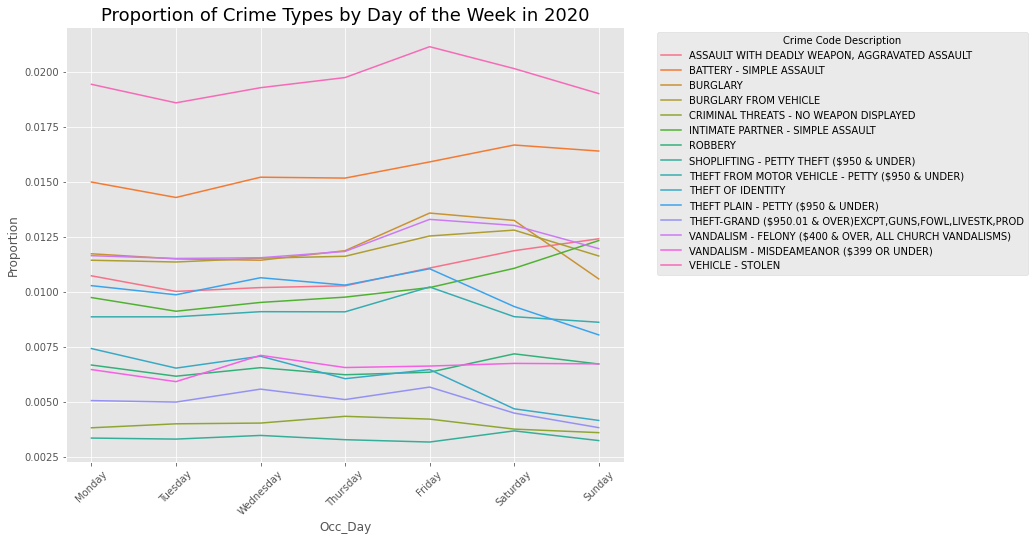

In [ ]:
df = LA_crimes_2020.groupby(['Occ_Day', 'Crime Code Description']).size().reset_index(name='Frequency')
df['Proportion'] = df['Frequency']/sum(df['Frequency'])

days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['Occ_Day'] = df['Occ_Day'].apply(lambda x: days[x])

plt.figure(figsize=(10,8))
sns.lineplot(x='Occ_Day', y='Proportion',hue='Crime Code Description', data=df)
plt.title('Proportion of Crime Types by Day of the Week in 2020', fontsize=18)
plt.legend(title = "Crime Code Description", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.savefig("Saved Plots/2020_analysis/Proportion of Crime Types by Day of the Week in 2020.png")
plt.show()

##### Proportion of Crime Types by Month in 2020
<p><a href='#top'>Go to top</a></p>
<p id='seven'></p>

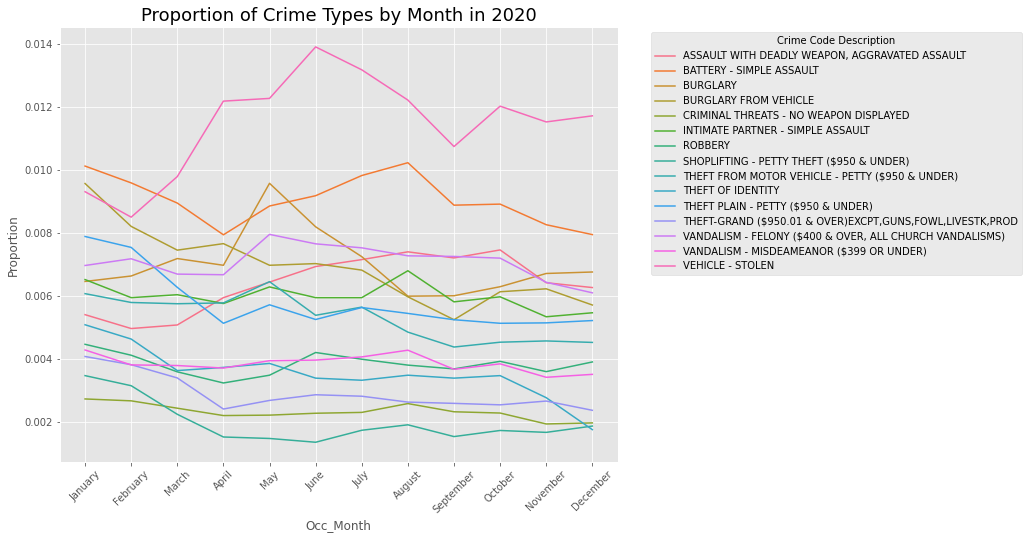

In [ ]:
df = LA_crimes_2020.groupby(['Occ_Month', 'Crime Code Description']).size().reset_index(name='Frequency')
df['Proportion'] = df['Frequency']/sum(df['Frequency'])

months = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August',
           9:'September', 10:'October', 11:'November', 12:'December'}
df['Occ_Month'] = df.Occ_Month.apply(lambda x: months[x])

plt.figure(figsize=(10,8))
sns.lineplot(x='Occ_Month', y='Proportion',hue='Crime Code Description', data=df)
plt.title('Proportion of Crime Types by Month in 2020', fontsize=18)
plt.legend(title='Crime Code Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.savefig('Saved Plots/2020_analysis/Proportion of Crimes by Months in 2020.png')
plt.show()

In [ ]:
df = crimes_2020.groupby('Occ_M/Y').size().reset_index(name='Frequency')
#plt.plot(df['Occ_M/Y'], df['Frequency'])
#plt.show()
df

,Occ_M/Y,Frequency
0,2020-01,17961
1,2020-02,16997
2,2020-03,15791
3,2020-04,15401
4,2020-05,16947
5,2020-06,16675
6,2020-07,16755
7,2020-08,16490
8,2020-09,15239
9,2020-10,15878


### Crimes Incidents/Frequency by Months(2020)
<p><a href='#top'>Go to top</a></p>
<p id='eight'></p>

In [ ]:
months = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August',
           9:'September', 10:'October', 11:'November', 12:'December'}

#crimes_2020['Months'] = crimes_2020['Occ_Month'].apply(lambda x : months[x])
df = crimes_2020.groupby('Occ_Month').size().reset_index(name="Frequency").sort_values('Occ_Month')
df['Frequency %'] =(df['Frequency']/sum(df['Frequency']))*100
df['Occ_Month'] = df['Occ_Month'].apply(lambda x: months[x])
df

,Occ_Month,Frequency,Frequency %
0,January,17961,9.303181
1,February,16997,8.803862
2,March,15791,8.179195
3,April,15401,7.977189
4,May,16947,8.777964
5,June,16675,8.637077
6,July,16755,8.678514
7,August,16490,8.541253
8,September,15239,7.893278
9,October,15878,8.224258


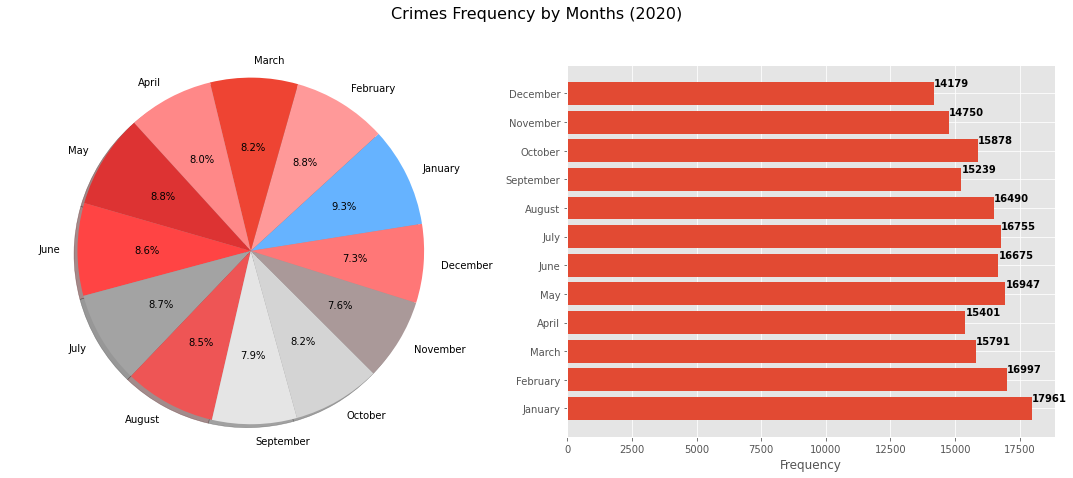

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(121)
labels=list(df['Occ_Month'])
sizes = list(df['Frequency'])
colors = ['#66b3ff','#ff9999','#ee4433','#ff8888','#dd3333','#ff4444','#a3a3a3','#ee5555','#e5e5e5','#d4d4d4','#aa9999','#ff7777']

plt.suptitle('Crimes Frequency by Months (2020)',y=1.1, fontsize=16 )
plt.pie(sizes, labels=labels,autopct='%1.1f%%',colors=colors, shadow=True, startangle=9 )
#plt.title('Crimes by Months(2020)', fontsize=12)
plt.axis('equal')
plt.tight_layout()
plt.grid(True)
#plt.savefig('2020_analysis/Crimes by Months(2020).png')

plt.subplot(122)
plt.barh(df['Occ_Month'], df['Frequency'])
for i, v in enumerate(df['Frequency'].values):
  plt.text(v+3, i+.25, str(v), fontweight='bold')
#plt.title('Crimes counts by Months(2020)', fontsize=12)
plt.xlabel('Frequency',fontsize=12)
plt.grid(True)
plt.savefig('Saved Plots/2020_analysis/Crimes by Months in 2020.png')
plt.tight_layout()
plt.show()

### Crimes Incidents/Frequency/Counts by Days of the Week (2020)
<p><a href='#top'>Go to top</a></p>
<p id='nine'></p>

In [ ]:
days_df = crimes_2020.groupby('Occ_Day').size().reset_index(name='Frequency').sort_values('Occ_Day')
days_df['CrimeCount %'] = (days_df['Frequency']/sum(days_df['Frequency']))*100

days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
days_df['Occ_Day'] = days_df['Occ_Day'].apply(lambda x: days[x])

days_df

,Occ_Day,Frequency,CrimeCount %
0,Monday,27368,14.175684
1,Tuesday,26581,13.768045
2,Wednesday,27758,14.377690
3,Thursday,27343,14.162734
4,Friday,29104,15.074872
5,Saturday,28168,14.590056
6,Sunday,26741,13.850919


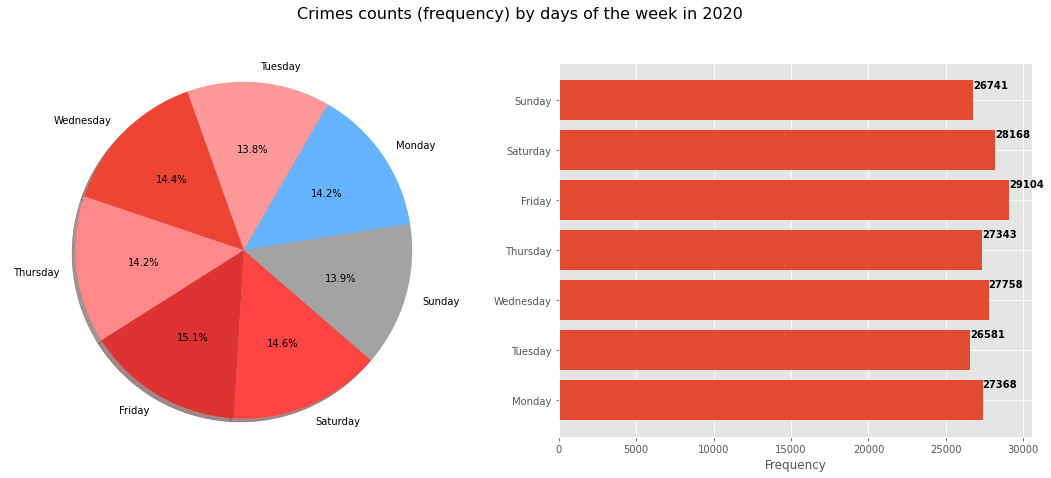

In [ ]:
plt.figure(figsize=(15,6))
labels=list(days_df['Occ_Day'])
sizes = list(days_df['Frequency'])
colors = ['#66b3ff','#ff9999','#ee4433','#ff8888','#dd3333','#ff4444','#a3a3a3']

plt.suptitle('Crimes counts (frequency) by days of the week in 2020',y=1.1, fontsize=16)
plt.subplot(121)
plt.pie(sizes, labels=labels,autopct='%1.1f%%',colors=colors, shadow=True, startangle=9 )
#plt.title('Crimes by Days of the Week', fontsize=12)
plt.axis('equal')
plt.grid(True)

plt.subplot(122)
plt.barh(days_df['Occ_Day'], days_df['Frequency'])
for i,v in enumerate(days_df['Frequency'].values):
  plt.text(v+3, i+.25, str(v), fontweight='bold')
#plt.title('Crimes counts by Day of the Week', fontsize=12)
plt.xlabel('Frequency',fontsize=12)
plt.grid(True)
plt.savefig('Saved Plots/2020_analysis/Crimes by Day of the Week in 2020.png')
plt.tight_layout()
plt.show()

#### Most and Less Frequent crimes in 2020
<p><a href='#top'>Go to top</a></p>
<p id='ten'></p>

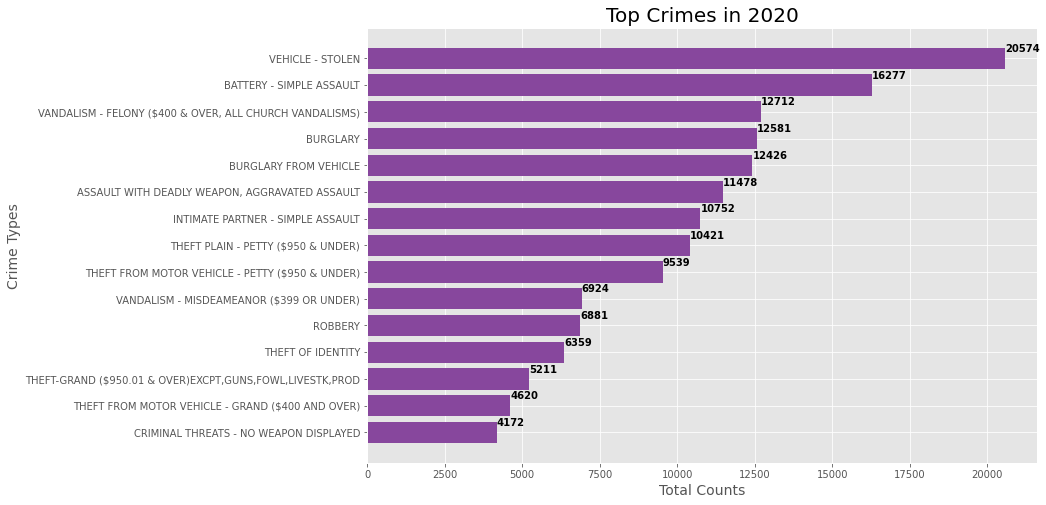

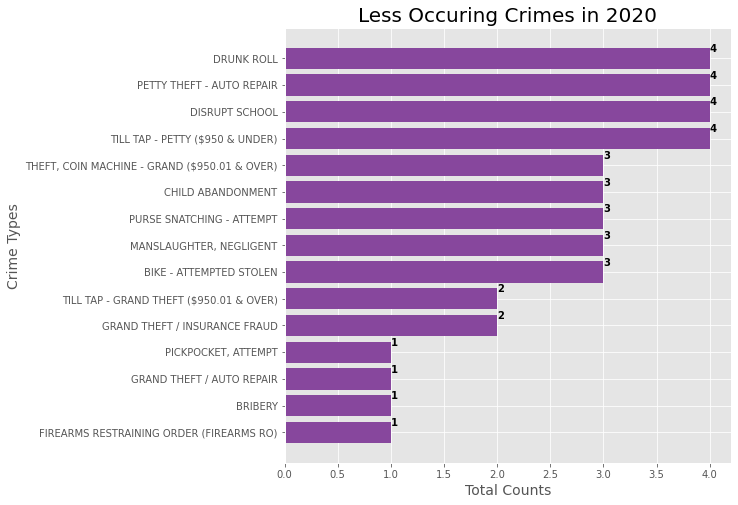

In [ ]:
df = crimes_2020.groupby('Crime Code Description').size().reset_index(name='Incident Counts').sort_values(['Incident Counts'],ascending=True)
plt.figure(figsize=(12,8))
df1 = df.tail(15)
plt.barh(df1['Crime Code Description'],df1['Incident Counts'],color='#87479d')
for i,v in enumerate(df1['Incident Counts'].values):
  plt.text(v, i+.25, str(v), fontweight='bold')
plt.title('Top Crimes in 2020', fontsize=20)
plt.xlabel('Total Counts', fontsize=14)
plt.ylabel('Crime Types', fontsize=14)
plt.savefig('Saved Plots/2020_analysis/Most occuring_crimes_2020.png')
plt.show()

plt.figure(figsize=(8,8))
df2 = df.head(15)
plt.barh(df2['Crime Code Description'],df2['Incident Counts'],color='#87479d')
for i,v in enumerate(df2['Incident Counts'].values):
  plt.text(v, i+.25, str(v), fontweight='bold')
plt.title('Less Occuring Crimes in 2020', fontsize=20)
plt.xlabel('Total Counts', fontsize=14)
plt.ylabel('Crime Types', fontsize=14)
plt.savefig('Saved Plots/2020_analysis/low_occuring_crimes_2020.png')
plt.show()


#### Victim Age and Sex Analysis
codes and figures are obvious. So i will not go into explations
<p><a href='#top'>Go to top</a></p>
<p id='eleven'></p>

In [ ]:
df_male = crimes_2020[crimes_2020['Victim Sex']=='M']
df_female = crimes_2020[crimes_2020['Victim Sex']=='F']
df_H = crimes_2020[crimes_2020['Victim Sex']=='H']
df_x = crimes_2020[crimes_2020['Victim Sex']=='X']
df_male.shape, df_female.shape, df_H.shape, df_x.shape

((82231, 38), (69362, 38), (17, 38), (16361, 38))

In [ ]:
df = crimes_2020[['Victim Sex', 'Victim Age']].groupby('Victim Sex')['Victim Age'].mean().reset_index(name='Avg_Age')
df

,Victim Sex,Avg_Age
0,F,38.369713
1,H,37.294118
2,M,37.454306
3,X,2.125481


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

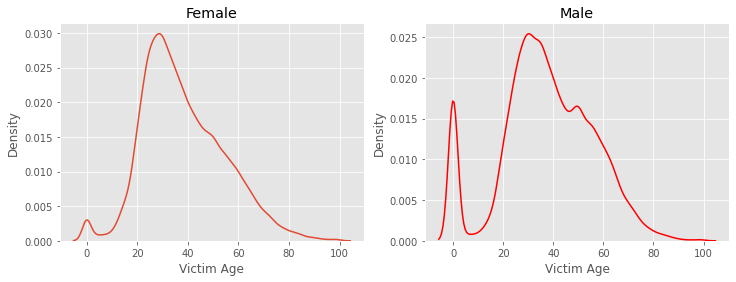

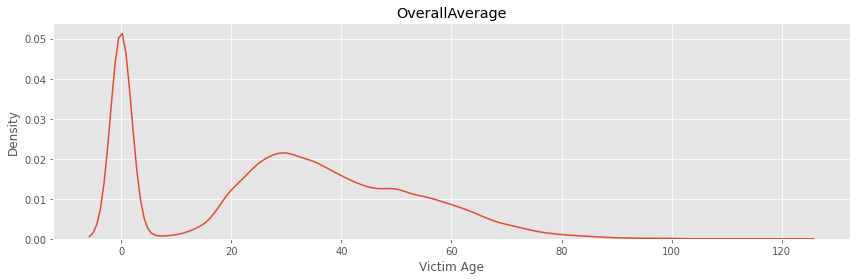

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.distplot(df_female['Victim Age'], hist=False, label='Female')
plt.title('Female')
plt.grid(True)

plt.subplot(122)
sns.distplot(df_male['Victim Age'], hist=False, color='red', label='Male')
plt.title('Male')
plt.grid(True)

plt.figure(figsize=(12,4))
sns.distplot(crimes_2020['Victim Age'], hist=False, label="OverallAvgAge")
plt.title('OverallAverage')
plt.grid(True)

plt.tight_layout()
plt.show()

### Top Crimes happening to Male and Female
<p><a href='#top'>Go to top</a></p>
<p id='12'></p>

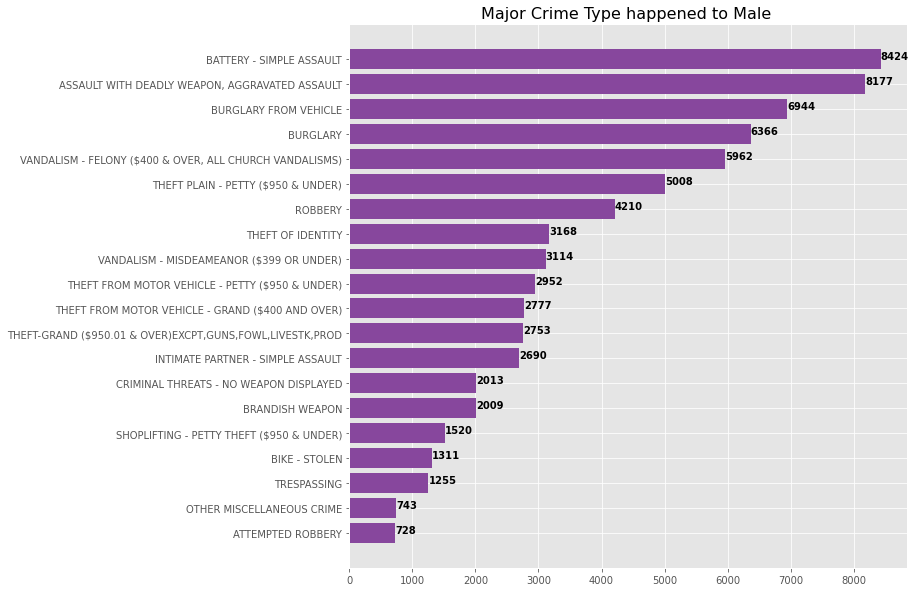

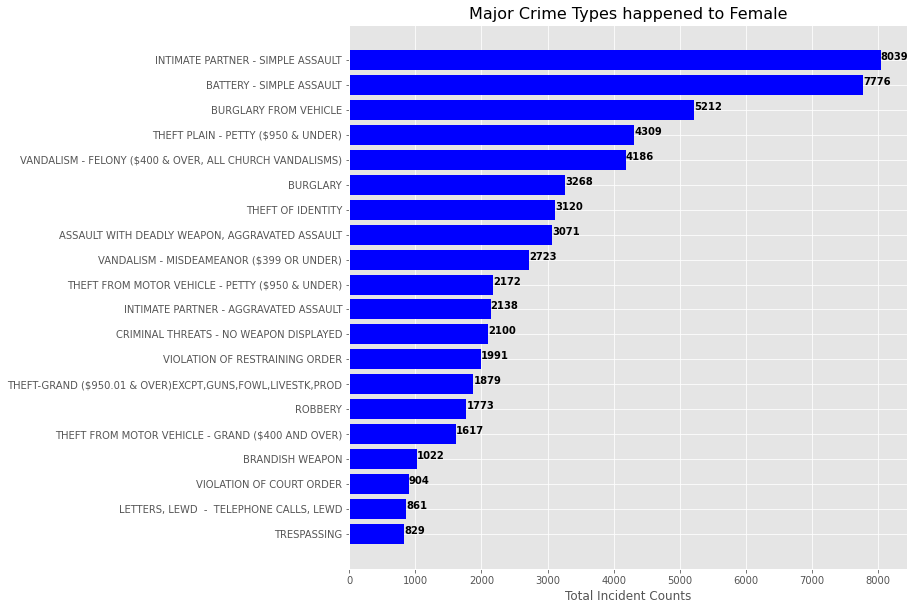

In [ ]:
df1 = df_male.groupby('Crime Code Description').size().reset_index(name='Total Incident Counts').sort_values('Total Incident Counts', ascending=True)
df2 = df_female.groupby('Crime Code Description').size().reset_index(name='Total Incident Counts').sort_values('Total Incident Counts', ascending=True)
df1 = df1.tail(20)
df2 = df2.tail(20)

plt.figure(figsize=(10,10))
#plt.suptitle('Top Crimes by Gender', fontsize=20)
#plt.subplot(211)
plt.barh(df1['Crime Code Description'], df1['Total Incident Counts'], label='Male', color='#87479d')
for i,v in enumerate(df1['Total Incident Counts'].values):
  plt.text(v, i, str(v), fontweight='bold')
plt.title('Major Crime Type happened to Male ', fontsize=16)
plt.savefig('Saved Plots/2020_analysis/Top Crimes happening to Male in 2020.png')
plt.show()

print('\n')
plt.figure(figsize=(10,10))
#plt.subplot(212)
plt.barh(df2['Crime Code Description'], df2['Total Incident Counts'], label='Female', color = 'blue')
for i,v in enumerate(df2['Total Incident Counts'].values):
  plt.text(v, i, str(v), fontweight='bold')
plt.title('Major Crime Types happened to Female', fontsize=16)
plt.xlabel('Total Incident Counts')
plt.savefig('Saved Plots/2020_analysis/Top Crimes happening to Female in 2020.png')
plt.show()


### Crime Trend for Male and Female (Victim Sex) by months in 2020
<p><a href='#top'>Go to top</a></p>
<p id='13'></p>

<Figure size 720x576 with 0 Axes>

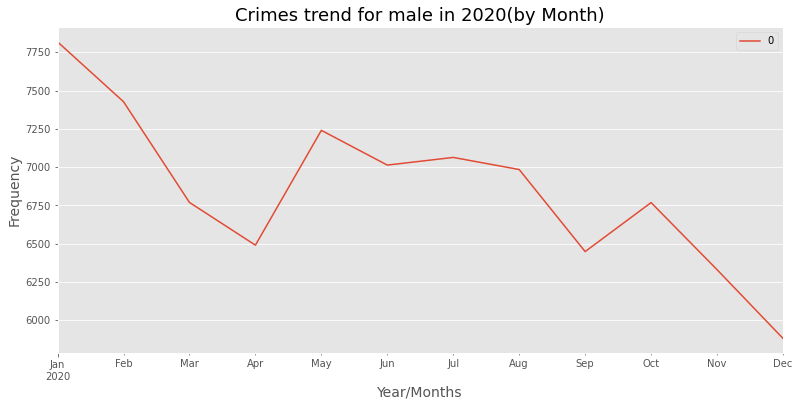

<Figure size 720x576 with 0 Axes>

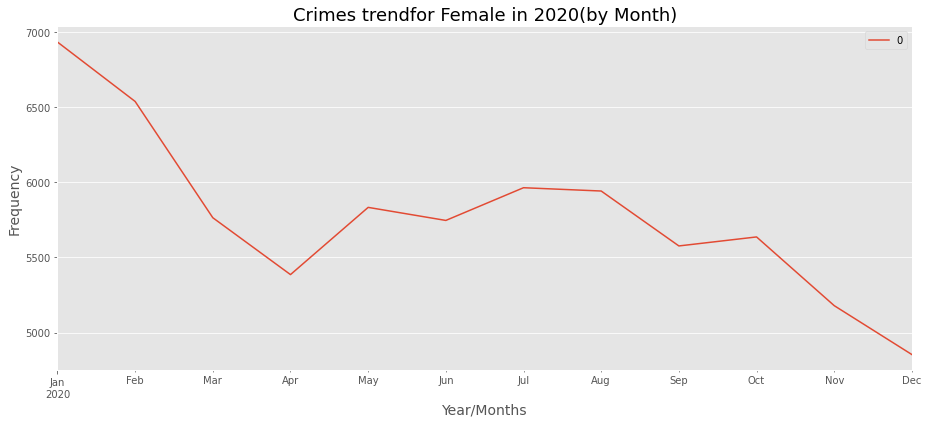

In [ ]:

df1 = df_male.groupby('Occ_M/Y').size().reset_index()
df1.index = df1['Occ_M/Y']
labels = list(df1['Occ_M/Y'])
plt.figure(figsize=(10,8))
#from pylab import rcParams
#rcParams['figure.figsize'] = 13, 6
df1.plot(label="Male")
plt.legend()
plt.title('Crimes trend for male in 2020(by Month)', fontsize=18)
plt.xlabel('Year/Months', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.savefig('Saved Plots/2020_analysis/Monthwise_Crimes_trends_for_Male_2020.png')
plt.show()

df2 = df_female.groupby('Occ_M/Y').size().reset_index()
df2.index = df2['Occ_M/Y']
labels = list(df2['Occ_M/Y'])
plt.figure(figsize=(10,8))
print('\n')
df2.plot(label='Female')
plt.legend()
plt.title('Crimes trendfor Female in 2020(by Month)', fontsize=18)
plt.xlabel('Year/Months', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.savefig('Saved Plots/2020_analysis/Monthwise_Crimes_trends_for_Female_2020.png')
plt.tight_layout()
plt.show()

### Crime trend for Victim Sex in 2020 by Day
<p><a href='#top'>Go to top</a></p>
<p id='14'></p>

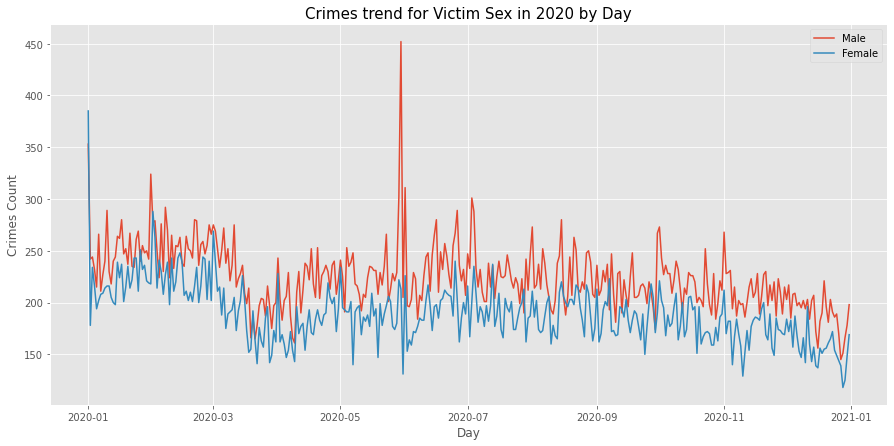

In [ ]:
df = df_male.groupby('Date Occurred').size().reset_index(name='Incident Counts')
df1 = df_female.groupby('Date Occurred').size().reset_index(name='Incident Counts')

plt.figure(figsize=(15,7))
plt.plot(df['Date Occurred'], df['Incident Counts'], label='Male')
plt.plot(df1['Date Occurred'], df1['Incident Counts'], label='Female')
plt.legend()
plt.title('Crimes trend for Victim Sex in 2020 by Day', fontsize=15)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Crimes Count', fontsize=12)
plt.savefig('Saved Plots/2020_analysis/crimes_trends_by_VictimSex_2020(by Day).png')
plt.show()

### Age Group Analysis

#### Crimes Counts by Age Group
first classify ages into groups like children, youths etc
<p><a href='#top'>Go to top</a></p>
<p id='15'></p>

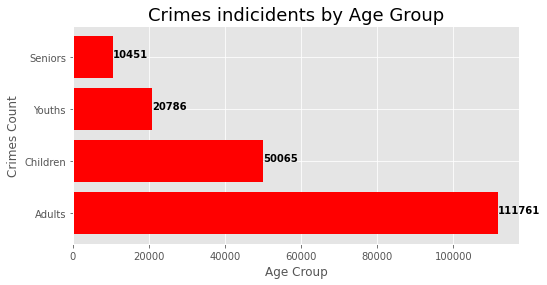

In [27]:
def classifyAge(age):
  if age in range(0,15):
    return "Children"
  elif age in range(15,25):
    return "Youths"
  elif age in range(25,65):
    return "Adults"
  elif age > 64:
    return "Seniors"
  else:
    "Invalid"

df = crimes_2020.copy()
df['Age Group'] = df['Victim Age'].apply(lambda x : classifyAge(x))

df_age = df.groupby('Age Group').size().reset_index(name='Total Incidents Count').sort_values('Total Incidents Count', ascending=False)
plt.figure(figsize=(8,4))
plt.barh(df_age['Age Group'], df_age['Total Incidents Count'], color='red')
for i,v in enumerate(df_age['Total Incidents Count'].values):
  plt.text(v, i, str(v), fontweight='bold')
plt.title('Crimes indicidents by Age Group', fontsize=18)
plt.xlabel('Age Croup', fontsize=12)
plt.ylabel('Crimes Count', fontsize=12)
plt.grid('True')
plt.savefig("Saved Plots/2020_analysis/Crimes counts by Age group.png")
plt.show()


### Crimes trend for Age Group in 2020 by Day
<p><a href='#top'>Go to top</a></p>
<p id='16'></p>

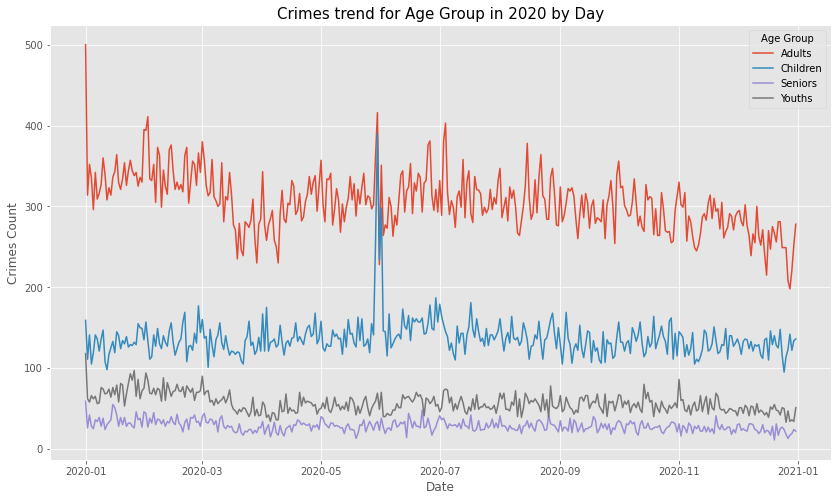

In [25]:
df1 = df.groupby(['Age Group','Date Occurred']).size().reset_index(name='Frequency')
plt.figure(figsize=(14,8))
sns.lineplot(x='Date Occurred', y='Frequency', hue='Age Group', data = df1)
plt.title('Crimes trend for Age Group in 2020 by Day', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Crimes Count', fontsize=12)
plt.savefig('Saved Plots/2020_analysis/crimes_trends_by_AgeGroup_2020(by Day).png')
plt.show()

In [36]:
data['Age Group'] = data['Victim Age'].apply(lambda x : classifyAge(x))
data1['Age Group'] = data1['Victim Age'].apply(lambda x : classifyAge(x))

#### What are the most frequent crimes happening to various age groups?
<p><a href='#top'>Go to top</a></p>
<p id='17'></p>

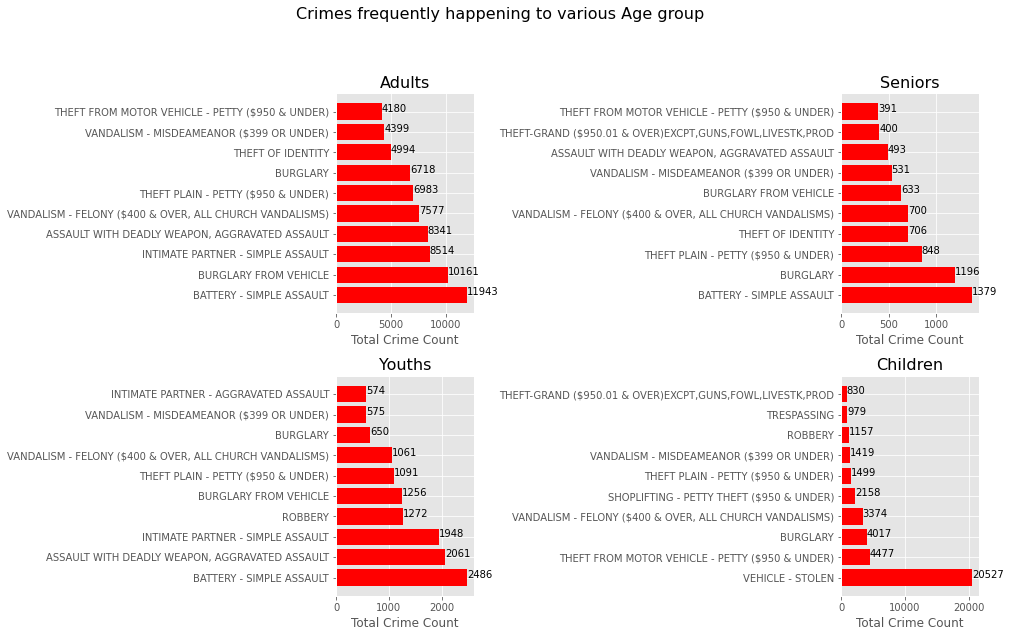

In [ ]:
agegroups = list(df['Age Group'].unique())
plt.figure(figsize=(14,8))
print('\n')
plt.suptitle('Crimes frequently happening to various Age group', fontsize=16, y=1.1)
for id, agegroup  in enumerate(agegroups):
  plt.subplot(2,2,id+1)
  df2 = df[df['Age Group']==agegroup]
  df2 = df2.groupby('Crime Code Description').size().reset_index(name='Crime Counts').sort_values('Crime Counts', ascending=False)
  df2 = df2.head(10)
  plt.barh(df2['Crime Code Description'], df2['Crime Counts'], color='red')
  for i,v in enumerate(df2['Crime Counts'].values):
    plt.text(v, i, str(v), fontweight='light')
  plt.title(agegroup, fontsize=16)
  plt.xlabel('Total Crime Count')
  plt.grid(True)
plt.tight_layout()
plt.savefig('Saved Plots/2020_analysis/Crimes_happening_grequently_to_various_agegroup(2020).png')
plt.show()


#### Crimes counts for Age Groups based on Sex(M or F)
<p><a href='#top'>Go to top</a></p>
<p id='18'></p>

In [ ]:
df2 = df.groupby(['Age Group','Victim Sex']).size().reset_index(name='Frequency')
X_index = df2[df2['Victim Sex']=='X'].index
H_index = df2[df2['Victim Sex']=='H'].index
index_to_be_removed = list(X_index) + list(H_index)
updated_df2 = df2.drop(index_to_be_removed)
updated_df2

,Age Group,Victim Sex,Frequency
0,Adults,F,51719
2,Adults,M,59830
4,Children,F,2259
6,Children,M,7875
8,Seniors,F,4801
10,Seniors,M,5627
12,Youths,F,10583
14,Youths,M,8899


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


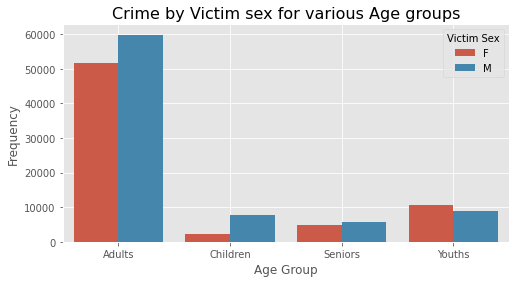

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(updated_df2['Age Group'], updated_df2['Frequency'], hue='Victim Sex', data= updated_df2)
plt.title('Crime by Victim sex for various Age groups', fontsize=16)
plt.savefig('Saved Plots/2020_analysis/Crime_by_Victim_sex_for_various_Age_groups.png')
plt.grid(True)
plt.show()

### Victim Descent Analysis
#### Crimes Count (Victim Descent)
<p><a href='#top'>Go to top</a></p>
<p id='three'></p>

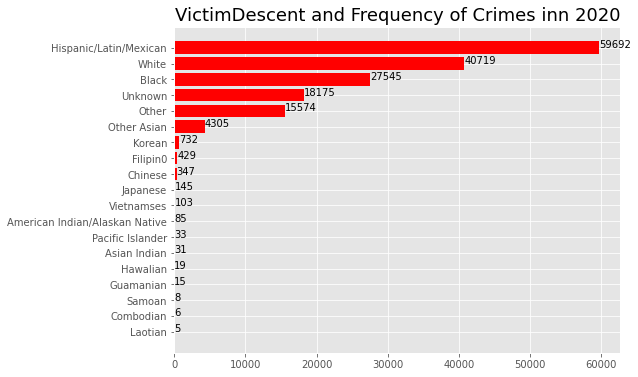

In [ ]:
Descent = {'A':'Other Asian', 'B':'Black', 'C':'Chinese', 'D':'Combodian','F':'Filipin0', 'G':'Guamanian',
           'H':'Hispanic/Latin/Mexican', 'I':'American Indian/Alaskan Native', 'J':'Japanese','K':'Korean',
           'L':'Laotian','O':'Other','P':'Pacific Islander', 'S':'Samoan', 'U':'Hawalian', 'V':'Vietnamses',
           'W':'White', 'X':'Unknown', 'Z':'Asian Indian', 'nan':'Nan'}
df = crimes_2020.copy()
des = ['B', 'H', 'W', 'X', 'A', 'O', 'C', 'F', 'K', 'I', 'V', 'J','G', 'P', 'U', 'S', 'Z', 'D', 'L']
df = df.loc[df['Victim Descent'].isin(des)]
df['Victim Descent'] = df['Victim Descent'].apply(lambda x: Descent[x])
descent_df = df.groupby('Victim Descent').size().reset_index(name='Frequency').sort_values('Frequency')

plt.figure(figsize=(8,6))
plt.barh(descent_df['Victim Descent'], descent_df['Frequency'], color='red')
for i,v in enumerate(descent_df['Frequency'].values):
   plt.text(v, i, str(v), fontweight='light')
plt.title('VictimDescent and Frequency of Crimes inn 2020', fontsize=18)
plt.grid('True')
plt.savefig('Saved Plots/2020_analysis/Crime_Frequency_by_victimDescent2020.png')
plt.show()

#### Top Crime by AREAS in 2020
<p><a href='#top'>Go to top</a></p>
<p id='23'></p>

In [ ]:
crimes_area = crimes_2020.groupby('AREA NAME').size().reset_index(name='Total Incidents Count').sort_values('Total Incidents Count', ascending=True)
crimes_area = crimes_area.reset_index()
crimes_area['Crimes in %'] = crimes_area['Total Incidents Count']*100/sum(crimes_area['Total Incidents Count'])
crimes_area.drop('index', axis=1, inplace=True)
crimes_area 

,AREA NAME,Total Incidents Count,Crimes in %
0,Foothill,6862,3.554280
1,Devonshire,7499,3.884224
2,Hollenbeck,7630,3.952078
3,West Valley,7753,4.015788
4,Topanga,7823,4.052045
5,Northeast,8201,4.247836
6,Mission,8213,4.254052
7,Van Nuys,8403,4.352465
8,Harbor,8632,4.471079
9,Rampart,8763,4.538933


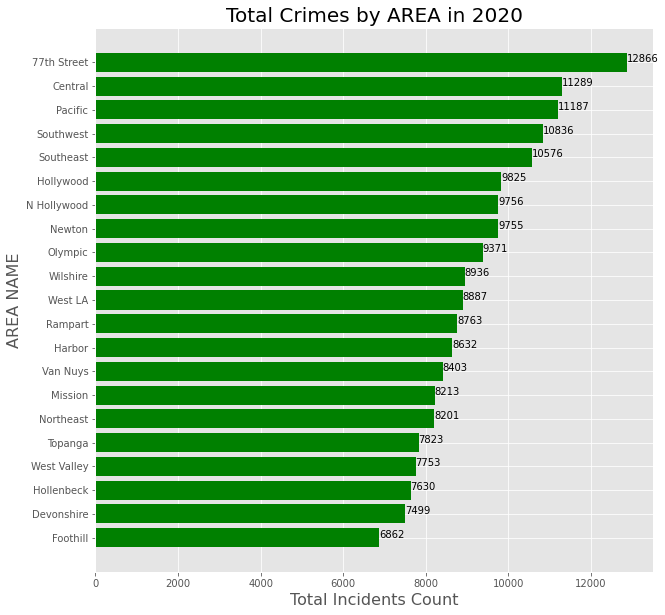

In [ ]:
plt.figure(figsize=(10,10))
plt.barh(crimes_area['AREA NAME'],crimes_area['Total Incidents Count'], color='green')
for i,v in enumerate(crimes_area['Total Incidents Count'].values):
  plt.text(v, i, str(v), fontweight='light')
plt.title('Total Crimes by AREA in 2020', fontsize=20)
plt.xlabel('Total Incidents Count', fontsize=16)
plt.ylabel('AREA NAME', fontsize=16)
plt.savefig('Saved Plots/2020_analysis/Crime_Frequency_by_AREA.png')
plt.show()

#### What are major Crimes happening in this Areas(above crime prone areas)?
<p><a href='#top'>Go to top</a></p>
<p id='24'></p>

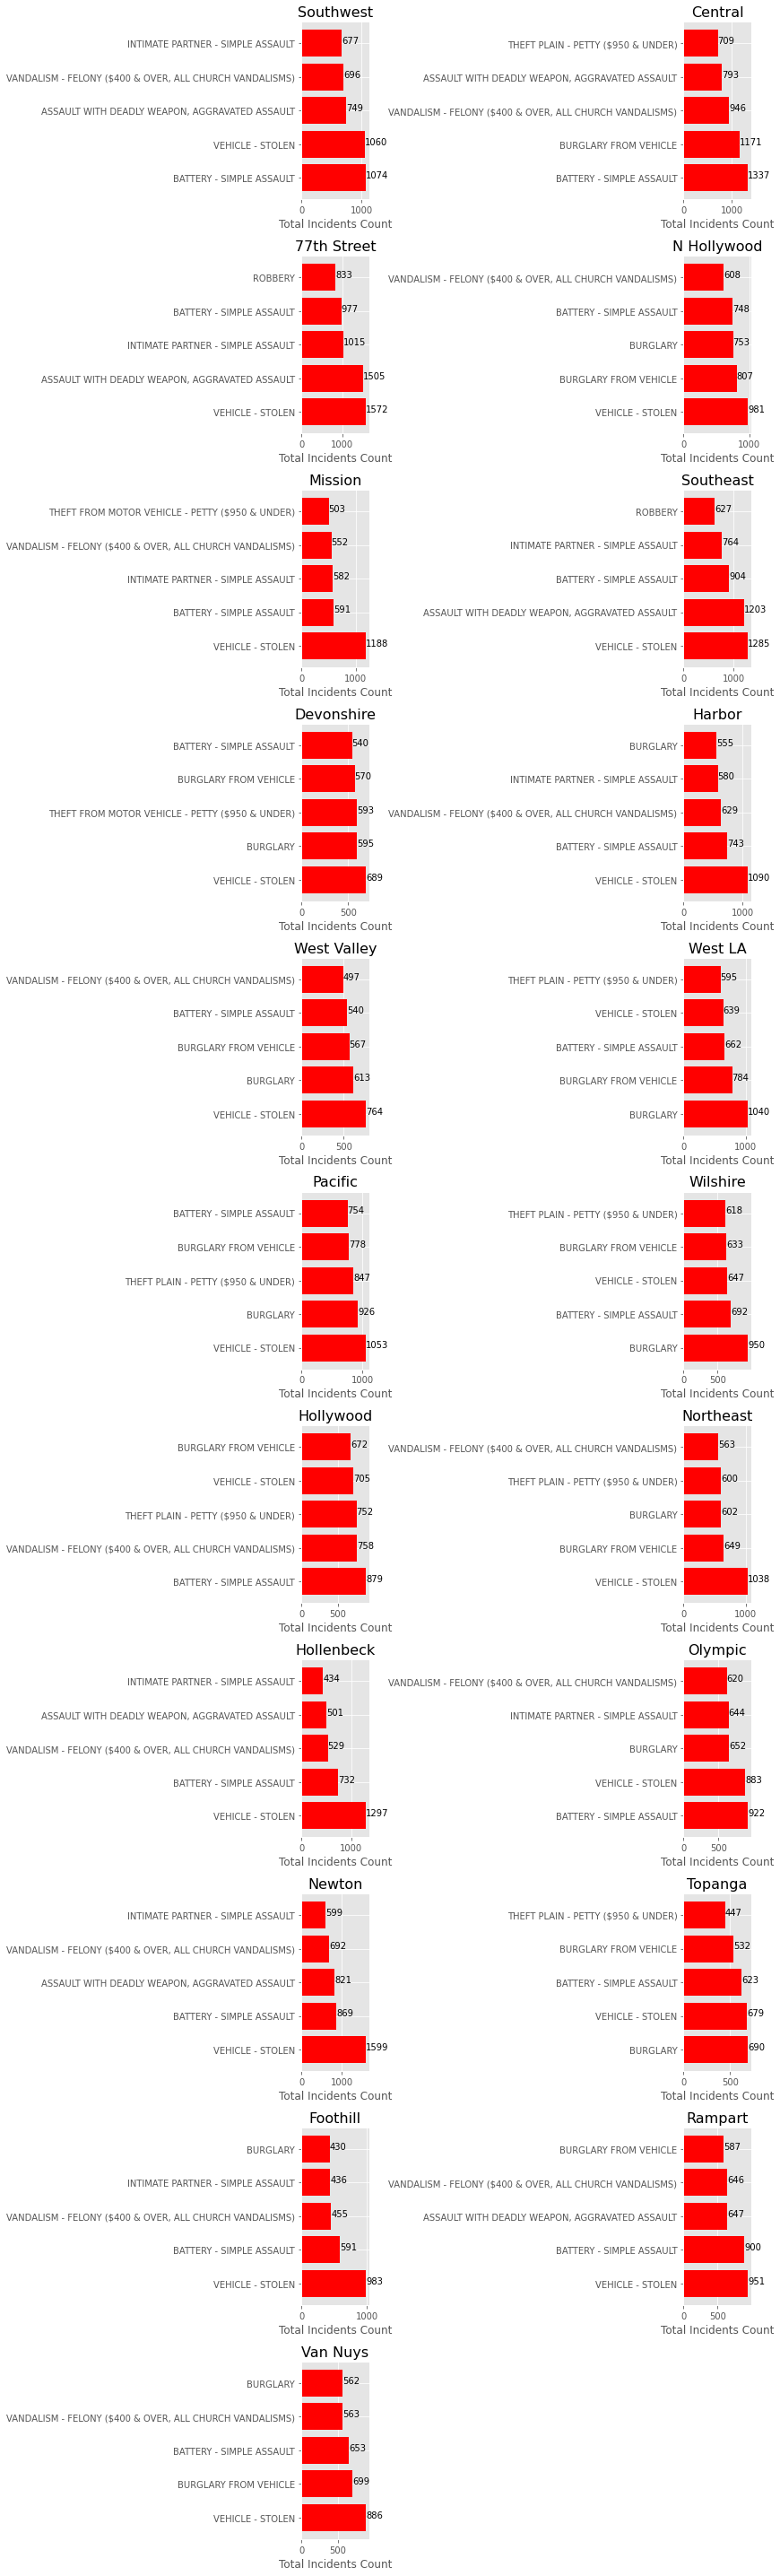

In [ ]:
AREAS = list(crimes_2020['AREA NAME'].unique())

if len(AREAS) % 2 == 0:
  n_rows = int(len(AREAS)/2)
else:
  n_rows = int((len(AREAS)+1)/2)

plt.figure(figsize=(12,40))
#plt.suptitle('Top Crimes by AREA in 2020', fontsize=20)
for id, area in enumerate(AREAS):
  plt.subplot(n_rows,2,id+1)
  df = crimes_2020[crimes_2020['AREA NAME']==area]
  df1 = df.groupby('Crime Code Description').size().reset_index(name='Total Incidents Count').sort_values('Total Incidents Count', ascending=False)
  df1 = df1.reset_index()
  #df1.index = df1['Crime Code Description']
  df1 = df1.drop('index', axis=1)
  df1 = df1.head(5)
  #print(df1)
  #plt.subplot(n_rows,2,id+1)
  plt.barh(df1['Crime Code Description'], df1['Total Incidents Count'], color='red')
  for i,v in enumerate(df1['Total Incidents Count'].values):
    plt.text(v, i, str(v), fontweight='light')
  plt.title(area, fontsize=16)
  plt.xlabel('Total Incidents Count')
  #plt.tick_params(axis='both',fontsize=12)
plt.tight_layout()
plt.savefig('Saved Plots/Most_common_crimes_by_Area.png')
plt.show()
#print('\n***************************************************************\n')





### Crimes at different Premises(top 20)
<p><a href='#top'>Go to top</a></p>
<p id='25'></p>

In [ ]:
premise_df = crimes_2020.groupby('Premise Description').size().reset_index(name='Total Incidents Count').sort_values('Total Incidents Count', ascending=False)
premise_df = premise_df.reset_index()
premise_df = premise_df.drop('index', axis=1)
premise_df.head(20)

,Premise Description,Total Incidents Count
0,STREET,49860
1,SINGLE FAMILY DWELLING,31760
2,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",23068
3,PARKING LOT,14256
4,SIDEWALK,9263
5,OTHER BUSINESS,8855
6,"VEHICLE, PASSENGER/TRUCK",6685
7,GARAGE/CARPORT,4067
8,DRIVEWAY,3946
9,RESTAURANT/FAST FOOD,2473


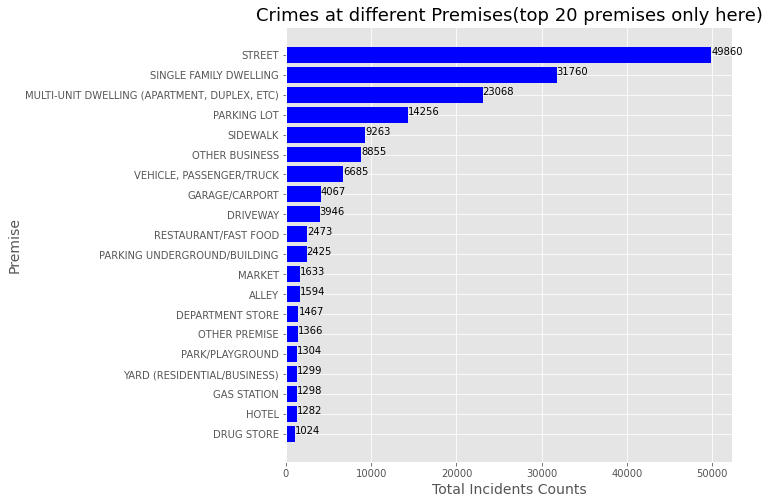

In [ ]:
plt.figure(figsize=(8,8))
premise_20 = premise_df.head(20).sort_values('Total Incidents Count', ascending=True)
plt.barh(premise_20['Premise Description'], premise_20['Total Incidents Count'], color='blue')
for i,v in enumerate(premise_20['Total Incidents Count'].values):
  plt.text(v, i, str(v), fontweight='light')
plt.title('Crimes at different Premises(top 20 premises only here)', fontsize=18)
plt.xlabel('Total Incidents Counts', fontsize=14)
plt.ylabel('Premise', fontsize=14)
plt.grid(True)
plt.savefig('Saved Plots/2020_analysis/Top 20 most crime premises.png')
plt.show()

#### What are the major crimes happening in this Premises?
<p><a href='#top'>Go to top</a></p>
<p id='26'></p>

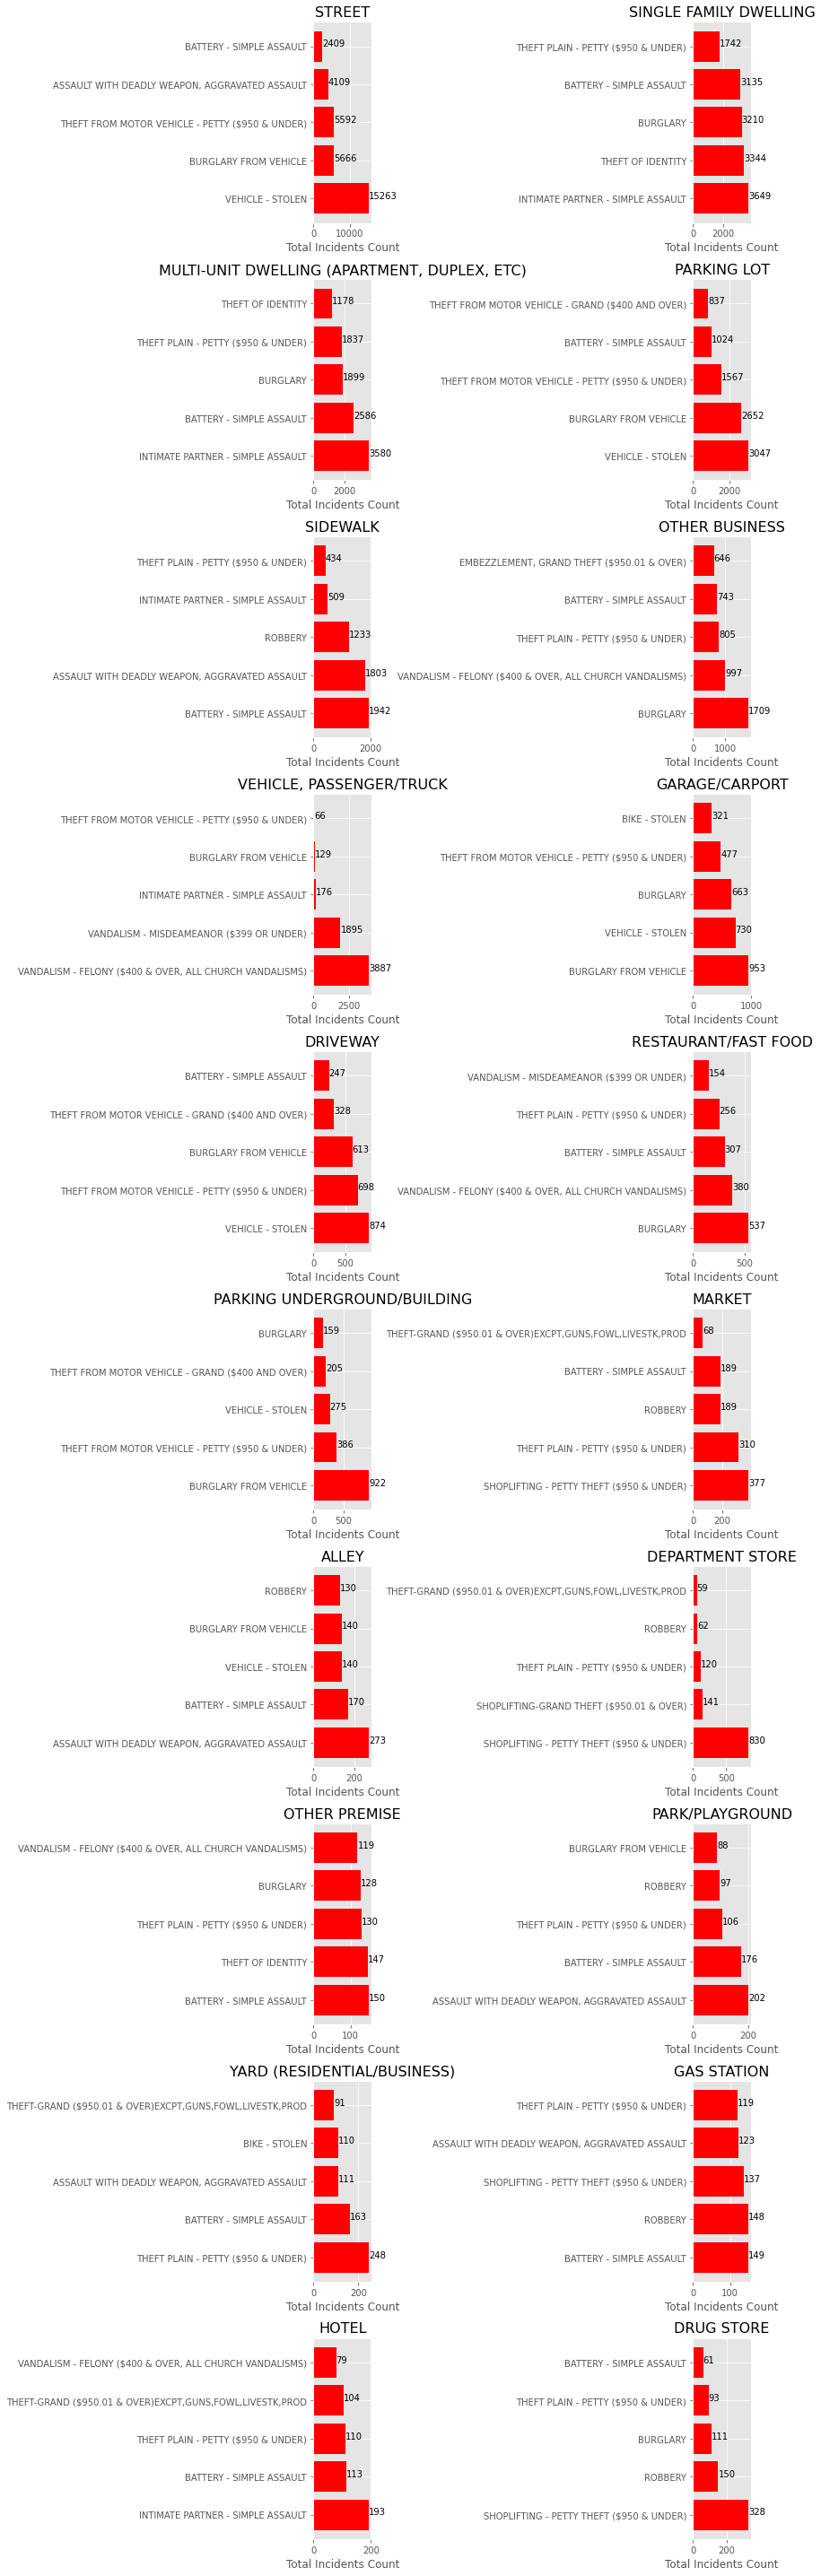

In [ ]:
premise_20 = premise_20.sort_values('Total Incidents Count', ascending=False)
premises = list(premise_20['Premise Description'].unique())

if (len(premises) % 2 == 0):
  n_rows = int(len(premises)/2)
else:
  n_rows = int((len(premises)+1)/2)

plt.figure(figsize=(12,40))
#plt.suptitle('Top Crimes by AREA in 2020', fontsize=20)
for id, premise in enumerate(premises):
  plt.subplot(n_rows,2,id+1)
  df = crimes_2020[crimes_2020['Premise Description']==premise]
  df = df.groupby('Crime Code Description').size().reset_index(name='Total Incidents Count').sort_values('Total Incidents Count', ascending=False)
  df = df.reset_index()
  df = df.drop('index', axis=1)
  df = df.head(5)
  plt.barh(df['Crime Code Description'], df['Total Incidents Count'], color='red')
  for i,v in enumerate(df['Total Incidents Count'].values):
    plt.text(v, i, str(v), fontweight='light')
  plt.title(premise, fontsize=16)
  plt.xlabel('Total Incidents Count')
  plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('Saved Plots/2020_analysis/Most_common_crimes_at_various_Premises.png')
plt.show()

### Weopons used in the Crimes
<p><a href='#top'>Go to top</a></p>
<p id='27'></p>

In [ ]:
weapons_df = crimes_2020.groupby('Weapon Description').size().reset_index(name='Frequency').sort_values('Frequency', ascending=False)
weapons_df = weapons_df.reset_index()
weapons_df = weapons_df.drop('index', axis=1)
weapons_df.head(10)

,Weapon Description,Frequency
0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",38591
1,UNKNOWN WEAPON/OTHER WEAPON,7815
2,VERBAL THREAT,5172
3,HAND GUN,3945
4,SEMI-AUTOMATIC PISTOL,1557
5,KNIFE WITH BLADE 6INCHES OR LESS,1517
6,UNKNOWN FIREARM,1398
7,OTHER KNIFE,1244
8,VEHICLE,719
9,ROCK/THROWN OBJECT,718


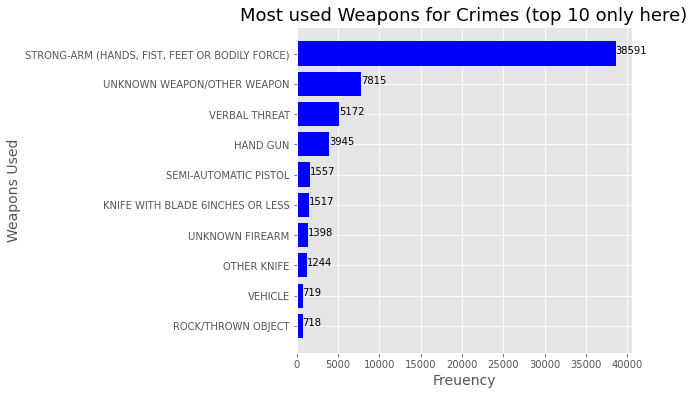

In [ ]:
plt.figure(figsize=(6,6))
weapons_10 = weapons_df.head(10).sort_values('Frequency', ascending=True)
plt.barh(weapons_10['Weapon Description'], weapons_10['Frequency'], color='blue')
for i,v in enumerate(weapons_10['Frequency'].values):
  plt.text(v, i, str(v), fontweight='light')
plt.title('Most used Weapons for Crimes (top 10 only here)', fontsize=18)
plt.xlabel('Freuency', fontsize=14)
plt.ylabel('Weapons Used', fontsize=14)
plt.grid(True)
plt.savefig('Saved Plots/2020_analysis/Top_10_most_used_weapons.png')
plt.show()


### Reporting District Crime Incidents
<p><a href='#top'>Go to top</a></p>
<p id='28'></p>

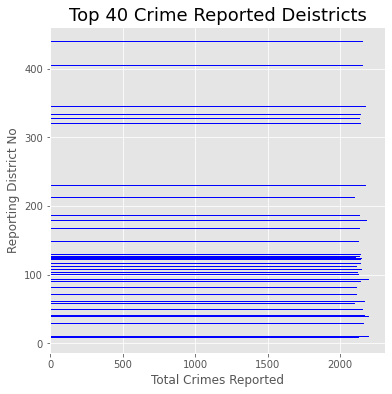

In [40]:
df = crimes_2020[['Reporting District No','LAT','LON']]
RepDist = df.groupby('Reporting District No').agg(
                                               lat = ('LAT','median'),
                                               lon = ('LON','median'),
                                               TotalIncidentsCount = ('Reporting District No','count')).reset_index().sort_values('Reporting District No', ascending=False)

RepDist_df = RepDist.head(50).sort_values('TotalIncidentsCount',ascending=True)
plt.figure(figsize=(6,6))
plt.barh(RepDist_df['TotalIncidentsCount'],RepDist_df['Reporting District No'], color='blue')
plt.title('Top 40 Crime Reported Deistricts', fontsize=18)
plt.ylabel('Reporting District No', Fontsize=12)
plt.xlabel('Total Crimes Reported', fontsize=12)
plt.grid(True)
plt.savefig('Saved Plots/2020_analysis/Top_50_most_crime_reported_Districts.png')
plt.show()

#### Reporting District Crime Mapping
<p><a href='#top'>Go to top</a></p>
<p id='29'></p>

In [ ]:
import folium
from branca.element import Figure
fig=Figure(width=750,height=350)
RepDistMap = folium.Map(width=550,height=350,location=[34.0467,	-118.2582	],zoom_start=11,min_zoom=8,max_zoom=14)
fig.add_child(RepDistMap)

for i, row in RepDist_df.iterrows():
    #setting for the popup
    popup=folium.Popup(row['Reporting District No'],max_width=1000)
    #Plotting the Marker for each stationsト
    folium.map.Marker(
        location=[row['lat'], row['lon']], 
        popup=popup,
        icon=folium.Icon(color="red",icon="anchor", prefix='fa')
    ).add_to(RepDistMap)
    
    folium.vector_layers.CircleMarker(
        location=[row['lat'], row['lon']], 
        radius=row['TotalIncidentsCount']/10,
        color='#3186cc',
        fill_color='#3186cc'
    ).add_to(RepDistMap)

RepDistMap